In [60]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from ortools.sat.python import cp_model
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, KFold, LeaveOneOut
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, r2_score, confusion_matrix, classification_report, mean_squared_error, mean_absolute_error
from sklearn.preprocessing import StandardScaler, LabelEncoder
from pgmpy.models import DiscreteBayesianNetwork
from pgmpy.factors.discrete import TabularCPD
from pgmpy.inference import VariableElimination

In [35]:
df = pd.read_csv('heart.csv')

X = df.iloc[:, :13]
y = df.iloc[:, 13]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = GaussianNB()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

kf = KFold(n_splits=5, shuffle=True, random_state=42)

model = LogisticRegression(max_iter=1000)

accuracy_scores = []

for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    accuracy_scores.append(accuracy_score(y_test, y_pred))

print(np.mean(accuracy_scores))

# NOT WORKING ON THIS DATA SET
# loo = LeaveOneOut()

# loo_scores = []

# for train_index, test_index in loo.split(X):
#     X_train, X_test = X.iloc[train_index], X.iloc[test_index]
#     y_train, y_test = y.iloc[train_index], y.iloc[test_index]

#     model.fit(X_train, y_train)

#     y_pred = model.predict(X_test)

#     loo_scores.append(accuracy_score(y_test, y_pred))

# np.mean(loo_scores)

0.8


c:\Python\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.8429268292682928


In [45]:
df = pd.read_csv('Iris.csv')
df['Species'].value_counts()
df['Species'] = df['Species'].replace({
    'Iris-setosa': 0,
    'Iris-versicolor': 1,
    'Iris-virginica': 2
})
X = df.iloc[:, :5]
y = df.iloc[:, 5]
y = (y == 0).astype(int)

df.head()

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.3, random_state=42)

svm = SVC(kernel='rbf', C=1, gamma='scale')
svm.fit(X_train, y_train)

y_pred = svm.predict(X_test)

print(accuracy_score(y_test, y_pred))

0.9238095238095239


C:\Users\Owais\AppData\Local\Temp\ipykernel_19864\2141270860.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Species'] = df['Species'].replace({


In [59]:
LR = LinearRegression()
ModelLR = LR.fit(X_train, y_train)

PredictionLR = ModelLR.predict(X_test)

teachLR = r2_score(y_test, PredictionLR)
print(teachLR * 100)

90.75197908387162


In [60]:
DT = DecisionTreeClassifier()

ModelDT = DT.fit(X_train, y_train)

y_pred = ModelDT.predict(X_test)

print(y_pred)

print(ModelDT.score(X_train, y_train) * 100)

print(accuracy_score(y_test, y_pred) * 100)

[0 1 0 0 0 1 0 0 0 0 0 1 1 1 1 0 0 0 0 0 1 0 1 0 0 0 0 0 1 1 1 1 0 1 1 0 0
 1 1 1 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 1 1 1 0 0 1 1 1 0 1 0 0 1 0 0 1 0 0
 0 0 0 0 1 0 0 1 1 0 0 1 0 1 1 0 0 0 0 0 0 0 1 1 0 0 1 1 1 0 0]
100.0
100.0


In [2]:
class VarArraySolutionPrinter(cp_model.CpSolverSolutionCallback):
    def __init__(self, variables: list[cp_model.IntVar]):
        cp_model.CpSolverSolutionCallback.__init__(self)
        self.__variables = variables
        self.__solution_count = 0

    def on_solution_callback(self) -> None:
        self.__solution_count += 1
        for v in self.__variables:
            print(f"{v}={self.value(v)}", end=" ")
        print()

    @property
    def solution_count(self) -> int:
        return self.__solution_count
    
model = cp_model.CpModel()

num_vals = 3
x = model.new_int_var(0, num_vals - 1, "x")
y = model.new_int_var(0, num_vals - 1, "y")
z = model.new_int_var(0, num_vals - 1, "z")

model.add(x != y)

solver = cp_model.CpSolver()
solution_printer = VarArraySolutionPrinter([x, y, z])
solver.parameters.enumerate_all_solutions = True

status = solver.solve(model, solution_printer)
print(f"Status = {solver.status_name(status)}")
print(f"Number of solutions found: {solution_printer.solution_count}")

x=1 y=0 z=0 
x=2 y=0 z=0 
x=2 y=0 z=1 
x=1 y=0 z=1 
x=2 y=1 z=1 
x=2 y=1 z=0 
x=2 y=1 z=2 
x=2 y=0 z=2 
x=1 y=0 z=2 
x=0 y=1 z=2 
x=0 y=1 z=1 
x=0 y=2 z=1 
x=0 y=2 z=2 
x=1 y=2 z=2 
x=1 y=2 z=1 
x=1 y=2 z=0 
x=0 y=2 z=0 
x=0 y=1 z=0 
Status = OPTIMAL
Number of solutions found: 18


In [4]:
frequencies = [15, 8, 20]  # For P1, P2, P3
volumes = [2, 1, 3]
distances = [1, 2, 3]      # For S1, S2, S3
num_products = len(frequencies)
num_slots = len(distances)

model = cp_model.CpModel()

product_to_slot = [model.NewIntVar(0, num_slots - 1, f'product_{i}_slot') for i in range(num_products)]

model.AddAllDifferent(product_to_slot)

cost_terms = []

for i in range(num_products):
    slot = product_to_slot[i]
    distance_var = model.NewIntVar(0, max(distances), f"distance_{i}")
    model.AddElement(slot, distances, distance_var)

    cost_var = model.NewIntVar(0, 1000, f'cost_{i}')
    model.AddMultiplicationEquality(cost_var, [distance_var, frequencies[i]])

    cost_terms.append(cost_var)

model.Minimize(sum(cost_terms))

solver = cp_model.CpSolver()
status = solver.solve(model)

if status == cp_model.OPTIMAL or status == cp_model.FEASIBLE:
    for i in range(num_products):
        print(f"Product {i + 1} assigned to Slot {solver.Value(product_to_slot[i]) + 1}")
else:
    print("No solution found.")

Product 1 assigned to Slot 2
Product 2 assigned to Slot 3
Product 3 assigned to Slot 1


In [12]:
model = DiscreteBayesianNetwork([
    ("PowerOutage", "Alarm"),
    ("Alarm", "Late"),
    ("Late", "MissBus"),
    ("MissBus", "LateToClass")
])

# P(PowerOutage)
cpd_poweroutage = TabularCPD(variable="PowerOutage", variable_card=2, values=[[0.1], [0.9]], state_names={"PowerOutage": ["Yes", "No"]})

# P(Alarm | PowerOutage)
cpd_alarm = TabularCPD(
    variable="Alarm", variable_card=2,
    values=[
        [0.1, 0.99],
        [0.9, 0.01]
    ],
    evidence=["PowerOutage"],
    evidence_card=[2],
    state_names={"Alarm": ["Rings", "Does Not Right"], "PowerOutage": ["Yes", "No"]}
)

# P(Late | Alarm)
cpd_late = TabularCPD(
    variable="Late", variable_card=2,
    values=[
        [0.3, 0.9],
        [0.7, 0.1],
    ],
    evidence=["Alarm"],
    evidence_card=[2],
    state_names={"Late": ["Yes", "No"], "Alarm": ["Rings", "Does Not Right"]}
)

# P(MissBus | Late)
cpd_missbus = TabularCPD(
    variable="MissBus", variable_card=2,
    values=[
        [0.8, 0.1],
        [0.2, 0.9],
    ],
    evidence=["Late"],
    evidence_card=[2],
    state_names={"MissBus": ["Yes", "No"], "Late": ["Yes", "No"]}
)

# P(LateToClass | MissBus)
cpd_latetoclass = TabularCPD(
    variable="LateToClass", variable_card=2,
    values=[
        [0.85, 0.2],
        [0.15, 0.8],
    ],
    evidence=["MissBus"],
    evidence_card=[2],
    state_names={"LateToClass": ["Yes", "No"], "MissBus": ["Yes", "No"]}
)

model.add_cpds(cpd_poweroutage, cpd_alarm, cpd_late, cpd_missbus, cpd_latetoclass)

assert model.check_model(), "Model is incorrect"

inference = VariableElimination(model)

print(inference.query(variables=["LateToClass"]))
print()
print(inference.query(variables=["LateToClass"], evidence={"PowerOutage": "Yes"}))

+------------------+--------------------+
| LateToClass      |   phi(LateToClass) |
+==================+====================+
| LateToClass(Yes) |             0.4285 |
+------------------+--------------------+
| LateToClass(No)  |             0.5715 |
+------------------+--------------------+

+------------------+--------------------+
| LateToClass      |   phi(LateToClass) |
+==================+====================+
| LateToClass(Yes) |             0.6472 |
+------------------+--------------------+
| LateToClass(No)  |             0.3528 |
+------------------+--------------------+


## Classification Social Network Ads

In [21]:
df = pd.read_csv('Social_Network_Ads.csv')
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [ ]:
df = df.drop("User ID", axis=1)

le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])

,Gender,Age,EstimatedSalary,Purchased
0,1,19,19000,0
1,1,35,20000,0
2,0,26,43000,0
3,0,27,57000,0
4,1,19,76000,0
...,...,...,...,...
395,0,46,41000,1
396,1,51,23000,1
397,0,50,20000,1
398,1,36,33000,0


In [28]:
X = df.drop('Purchased', axis=1)
y = df['Purchased']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

DT = DecisionTreeClassifier()
DT.fit(X_train, y_train)

y_pred = DT.predict(X_test)

print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.8375
[[46  6]
 [ 7 21]]
              precision    recall  f1-score   support

           0       0.87      0.88      0.88        52
           1       0.78      0.75      0.76        28

    accuracy                           0.84        80
   macro avg       0.82      0.82      0.82        80
weighted avg       0.84      0.84      0.84        80



## Linear Regression Score

In [54]:
df = pd.read_csv('score.csv')
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [48]:
df.isna().sum()

Hours     0
Scores    0
dtype: int64

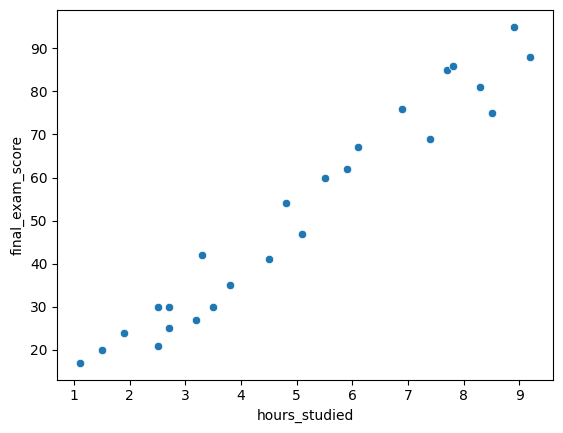

In [55]:
df.rename(columns={"Hours": "hours_studied", "Scores": "final_exam_score"}, inplace=True)
sns.scatterplot(data=df, x="hours_studied", y="final_exam_score")
plt.xlabel("hours_studied")
plt.ylabel("final_exam_score")
plt.show()

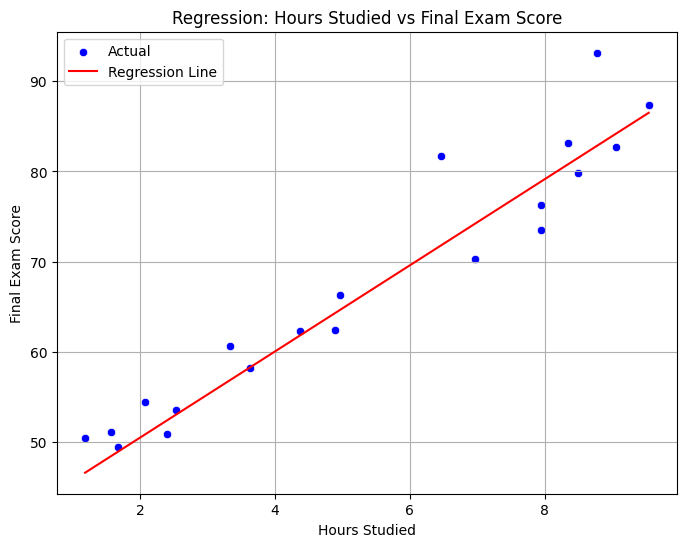

0.9120261074601291
16.342487842924996
2.9567128895948835


In [64]:
X = df[['hours_studied']]
y = df['final_exam_score']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

LR = LinearRegression()
LR.fit(X_train, y_train)

y_pred = LR.predict(X_test)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_test['hours_studied'], y=y_test, color='blue', label='Actual')
sns.lineplot(x=X_test['hours_studied'], y=y_pred, color='red', label='Regression Line')
plt.title('Regression: Hours Studied vs Final Exam Score')
plt.xlabel('Hours Studied')
plt.ylabel('Final Exam Score')
plt.legend()
plt.grid(True)
plt.show()

print(r2_score(y_test, y_pred))
print(mean_squared_error(y_test, y_pred))
print(mean_absolute_error(y_test, y_pred))

## KMEANS CC GENERAL

In [85]:
df = pd.read_csv('CC GENERAL.csv')
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [86]:
df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [87]:
df['MINIMUM_PAYMENTS'] = df['MINIMUM_PAYMENTS'].fillna(df['MINIMUM_PAYMENTS'].median())
df = df.dropna()
df = df.drop('CUST_ID', axis=1)

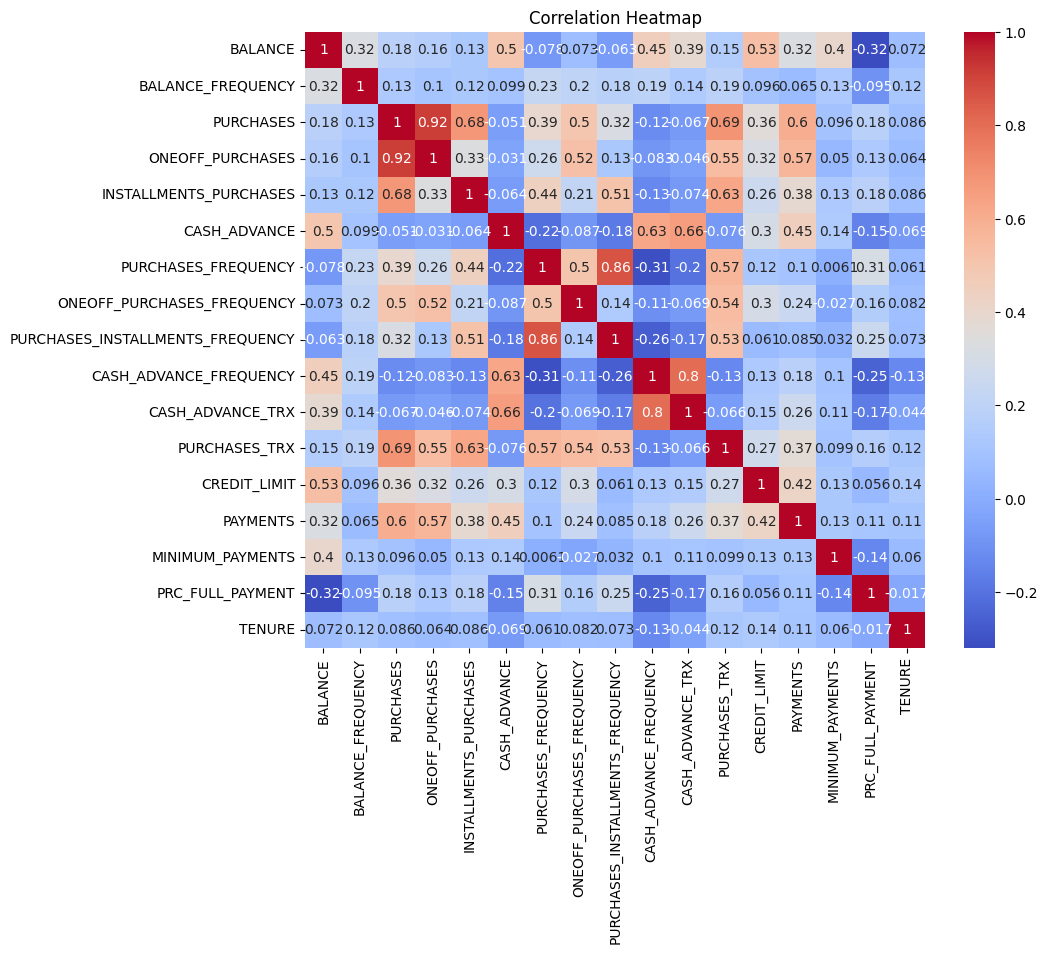

In [88]:
plt.figure(figsize=(10, 8))
sns.heatmap(data=df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

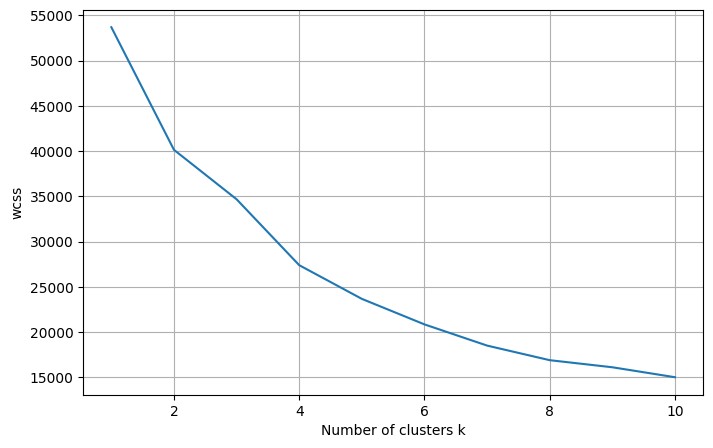

In [89]:
features = ['BALANCE', 'PURCHASES', 'CASH_ADVANCE', 'CREDIT_LIMIT', 'PAYMENTS', 'TENURE']
df_selected = df[features].copy()

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_selected)

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss)
plt.xlabel("Number of clusters k")
plt.ylabel("wcss")
plt.grid(True)
plt.show()

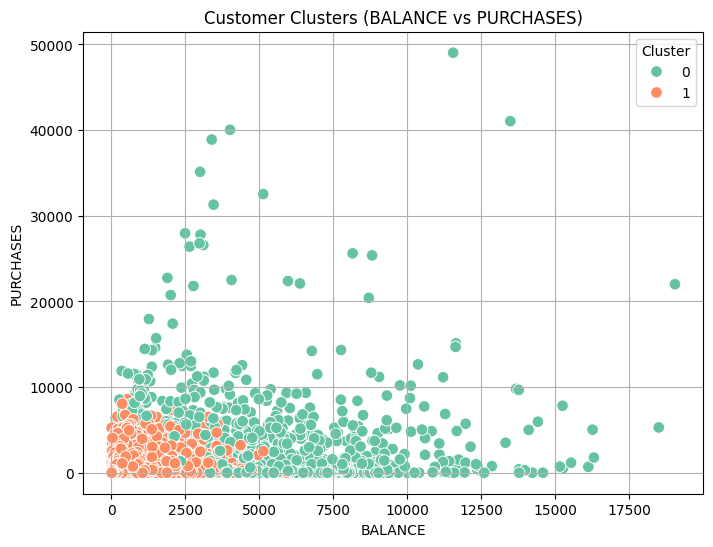

In [90]:
kmeans = KMeans(n_clusters=2, random_state=42)
clusters = kmeans.fit_predict(df_scaled)

df_selected['Cluster'] = clusters

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_selected, x="BALANCE", y="PURCHASES", hue="Cluster", palette='Set2', s=70)
plt.title('Customer Clusters (BALANCE vs PURCHASES)')
plt.xlabel('BALANCE')
plt.ylabel('PURCHASES')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()